# Excercise 2

In Excercise 1, we computed the LDA for a multi-class problem, the IRIS dataset. In this excercise, we will now compare the LDA and PCA for the IRIS dataset.

To revisit, the iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:
1. Iris-setosa (n=50)
2. Iris-versicolor (n=50)
3. Iris-virginica (n=50)

The four features of the Iris dataset:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

<img src="iris_petal_sepal.png">



In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set();
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import pi
from sklearn.preprocessing import StandardScaler

### Importing the dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

dataset.tail()

,sepal-length,sepal-width,petal-length,petal-width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Data preprocessing

Once dataset is loaded into a pandas data frame object, the first step is to divide dataset into features and corresponding labels and then divide the resultant dataset into training and test sets. The following code divides data into labels and feature set:

In [3]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values
#print(y)


The above script assigns the first four columns of the dataset i.e. the feature set to X variable while the values in the fifth column (labels) are assigned to the y variable.

The following code divides data into training and test sets:

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Feature Scaling

We will now perform feature scaling as part of data preprocessing too. For this task, we will be using scikit learn `StandardScalar`.

In [5]:
sc = StandardScaler()
X = sc.fit_transform(X)

## Write your code below

Write your code to compute the PCA and LDA on the IRIS dataset below.

In [6]:
### WRITE YOUR CODE HERE ####
def pca_transform(X_input, num_components):

    """ PCA algorithm as per our pseudo code above.

    Parameters:
    --------------

    X_input: ndarray (num_examples (rows) x num_features(columns))
    Our input data on which we would like to perform PCA.

    num_components: int
    Defines the kth number of principal components (or eigenvectors) to keep
    while performing PCA. These components will be chosen in decreasing 
    order of variances (or eigenvalues).

    """

    # Centering our data (Step 1)
    X_mean = np.mean(X_input, axis=0)
    X_mean = X_mean.reshape(1, -1)
    X_input -= X_mean

    num_examples = (X_input.shape)[0]
    constant = 1/(num_examples - 1)

    # Calculating covariance matrix (Step 2)
    cov_matrix = constant * np.dot(X_input.T, X_input)
    cov_matrix = np.array(cov_matrix, dtype=float)

    # Calculating eigen values and eigen vectors (or first n-principal components)
    # Step 3
    eigvals, eigvecs = np.linalg.eig(cov_matrix)

    # Step 4
    idx = eigvals.argsort()[::-1]
    eigvals = eigvals[idx][:num_components]
    eigvecs = np.atleast_1d(eigvecs[:, idx])[:, :num_components]

    X_projected = np.dot(X_input, eigvecs)
    eigvecs = eigvecs.T
    return X_projected, eigvecs, eigvals

In [7]:
# Calculating covariance of an input matrix
def calc_cov_matrix(X_input):
  n_samples = np.shape(X_input)[0]
  #print(n_samples)
  cov_matrix = np.array((1 / (n_samples-1)) * (X_input - X_input.mean(axis=0)).T.dot(X_input - X_input.mean(axis=0)))

  return cov_matrix
def LDA(X, y):
    
    classes=np.unique(y_train)
    num_classes=range(classes.shape[0])

    means=np.empty((len(num_classes),X.shape[1]))
    
    j=0
    for i in num_classes:
        #print(sorted_X[j:j+count[i]])
        means[i]=np.mean(X[j:j+50], axis=0)
        #print(means[i])
        j=j+50
    #print(means)
    #print(sorted_X)
    Mean=np.mean(means)
    SB=np.zeros((X.shape[1],X.shape[1]))
    SW=np.zeros((X.shape[1],X.shape[1]))
    j=0
    for i in num_classes:
        SB += np.dot((means[i]-Mean),(means[i]-Mean).T)
        SW += calc_cov_matrix(X[j:j+50])
        j=j+50
    #print(SB)
    #print(SW)
    eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(SW).dot(SB))
    # Make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(np.abs(eigvals[i]), eigvecs[:,i]) for i in range(len(eigvals))]

    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

    # Visually confirm that the list is correctly sorted by decreasing eigenvalues
    #print(eig_pairs)
    #print('Eigenvalues in decreasing order:\n')
    #for i in eig_pairs:
       # print(i[0])
    num_features=X_train.shape[1]
    W = np.hstack((eig_pairs[0][1].reshape(num_features,1), eig_pairs[1][1].reshape(num_features,1)))
    X_LDA = np.dot(X, W.real)
    #W=eig_pairs[0][1].reshape(num_features,1)
    #print('Matrix W:\n', W.real)
    return X_LDA,means

In [8]:

def plot_Iris(Setosa,Versicolor,Virginica,x_label,y_label,plot_title):

    ax = plt.subplot(111)
    
    plt.scatter(x=Setosa[:,0],y=Setosa[:,1],marker='^',color='blue',alpha=0.5,label="Setosa")
    plt.scatter(x=Versicolor[:,0],y=Versicolor[:,1],marker='s',color='red',alpha=0.5,label="Versicolor")
    plt.scatter(x=Virginica[:,0],y=Virginica[:,1],marker='o',color='green',alpha=0.5,label="Virginica")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    leg = plt.legend(loc='lower right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    #plt.title()
    plt.title(plot_title)
    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.tight_layout
    plt.grid()

    plt.show()

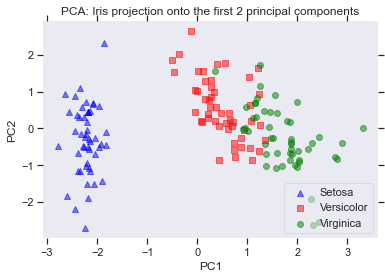

In [9]:
X_PCA,_,_ = pca_transform(X, 2)
list_Setosa=[]
list_Versicolor=[]
list_Virginica=[]
for i in range(X.shape[0]):
    if y[i]=='Iris-setosa':
        list_Setosa.append(X_PCA[i])
    elif y[i]=='Iris-versicolor':
        list_Versicolor.append(X_PCA[i])
    elif y[i]=='Iris-virginica':
        list_Virginica.append(X_PCA[i])
Setosa=np.array(list_Setosa)
Versicolor=np.array(list_Versicolor)
Virginica=np.array(list_Virginica)
#print(Setosa.shape,Versicolor.shape,Virginica.shape)
x_label='PC1'
y_label='PC2'
plot_title='PCA: Iris projection onto the first 2 principal components'
plot_Iris(Setosa,Versicolor,Virginica,x_label,y_label,plot_title)

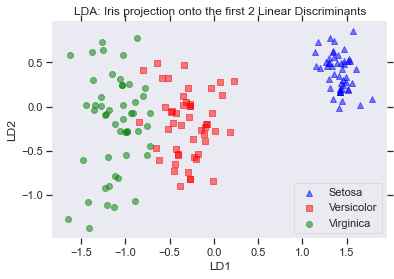

In [10]:
X_LDA,_= LDA(X, y)

list_Setosa=[]
list_Versicolor=[]
list_Virginica=[]
for i in range(X.shape[0]):
    if y[i]=='Iris-setosa':
        list_Setosa.append(X_LDA[i])
    elif y[i]=='Iris-versicolor':
        list_Versicolor.append(X_LDA[i])
    elif y[i]=='Iris-virginica':
        list_Virginica.append(X_LDA[i])
Setosa=np.array(list_Setosa)
Versicolor=np.array(list_Versicolor)
Virginica=np.array(list_Virginica)
#print(Setosa.shape,Versicolor.shape,Virginica.shape)
x_label='LD1'
y_label='LD2'
plot_title='LDA: Iris projection onto the first 2 Linear Discriminants'
plot_Iris(Setosa,Versicolor,Virginica,x_label,y_label,plot_title)